# Determine the match_id of a desired UEFA Euro match below.

In [1]:
from statsbombpy import sb
import pandas as pd
import warnings
from statsbombpy import api_client

warnings.filterwarnings("ignore", category=api_client.NoAuthWarning)
matches = sb.matches(competition_id=55,season_id=282)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(matches[['match_id','match_date','competition','home_team','away_team','home_score','away_score','competition_stage']])

,match_id,match_date,competition,home_team,away_team,home_score,away_score,competition_stage
0,3942819,2024-07-10,Europe - UEFA Euro,Netherlands,England,1,2,Semi-finals
1,3943043,2024-07-14,Europe - UEFA Euro,Spain,England,2,1,Final
2,3942752,2024-07-09,Europe - UEFA Euro,Spain,France,2,1,Semi-finals
3,3942382,2024-07-06,Europe - UEFA Euro,Netherlands,Turkey,2,1,Quarter-finals
4,3942349,2024-07-05,Europe - UEFA Euro,Portugal,France,0,0,Quarter-finals
5,3930180,2024-06-25,Europe - UEFA Euro,Netherlands,Austria,2,3,Group Stage
6,3930171,2024-06-20,Europe - UEFA Euro,Denmark,England,1,1,Group Stage
7,3942227,2024-07-06,Europe - UEFA Euro,England,Switzerland,1,1,Quarter-finals
8,3942226,2024-07-05,Europe - UEFA Euro,Spain,Germany,2,1,Quarter-finals
9,3938645,2024-06-26,Europe - UEFA Euro,Ukraine,Belgium,0,0,Group Stage


# Input match_id of the desired UEFA Euro match below.

In [14]:
match = str(input('Please enter the match id: '))

Please enter the match id: 3930171


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mplsoccer.pitch import Pitch 
from mplsoccer.pitch import VerticalPitch 
from plottable import Table
import matplotlib.colors as mcolors
from soccerplots.utils import add_image

class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
    
def nums_cumulative_sum(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]

def duplicate_last_number(nums_list):
    nums_list.append(nums_list[-1])
    return nums_list

def last_minute_of_game(h_minute,a_minute,h_cumulative_old,a_cumulative_old):
    h_last = h_minute[-1]
    a_last = a_minute[-1]
    if h_last<90 and a_last<90:
        h_minute.append(90)
        a_minute.append(90)
        h_cumulative_old = duplicate_last_number(h_cumulative_old)
        a_cumulative_old = duplicate_last_number(a_cumulative_old)
    if h_last>a_last and h_last>=90:
        a_minute.append(h_last)
        a_cumulative_old = duplicate_last_number(a_cumulative_old)
    if a_last>h_last and a_last>=90:
        h_minute.append(a_last)
        h_cumulative_old = duplicate_last_number(h_cumulative_old)
    return h_minute,a_minute,h_cumulative_old,a_cumulative_old

def step_limit(x, y, x_target, step_type='pre'):
    if step_type == 'pre':
        for i in range(1, len(x)):
            if x[i] > x_target:
                return y[i-1]
        return y[-1]

    elif step_type == 'post':
        for i in range(len(x)):
            if x[i] >= x_target:
                return y[i]
        return y[-1]
    
def truncate_text(text, max_length):
    if len(text) > max_length:
        return text[:max_length-3] + '...'
    return text

In [16]:
match = int(match)
match_id = match

home_info = []
away_info = []

matches = sb.matches(competition_id=55,season_id=282)
matches = matches[matches['match_id'] == match_id].reset_index()

home_info.append(matches.loc[0,'home_team'])
away_info.append(matches.loc[0,'away_team'])
home_info.append(matches.loc[0,'home_score'])
away_info.append(matches.loc[0,'away_score'])

events = sb.events(match_id = match_id)
lineups = sb.lineups(match_id = match_id)

In [17]:
events = events[events['type']=='Shot']
xG = pd.DataFrame(events['minute'])
xG['period'] = events['period']
xG['xG'] = events['shot_statsbomb_xg']
xG['team'] = events['team']
xG['team_id'] = events['team_id']
xG['result'] = events['shot_outcome']
xG = xG[xG['period'] < 5]
xG = xG.fillna(0)
xG = xG.reset_index()

for i in range(len(xG['minute'])):
    if xG.loc[i,'period'] == 1:
        if xG.loc[i,'minute'] > 45:
            xG.loc[i,'minute'] = 45
    if xG.loc[i,'period'] == 2:
        if xG.loc[i,'minute'] > 90:
            xG.loc[i,'minute'] = 90
    if xG.loc[i,'period'] == 3:
        if xG.loc[i,'minute'] > 105:
            xG.loc[i,'minute'] = 105
    if xG.loc[i,'period'] == 4:
        if xG.loc[i,'minute'] > 120:
            xG.loc[i,'minute'] = 120
                        
xG_home = xG[xG['team']==home_info[0]].reset_index()
xG_away = xG[xG['team']==away_info[0]].reset_index()

h_xG = [0]
a_xG = [0]
h_min = [0]
a_min = [0]

for x in range(len(xG['xG'])):
    if xG.loc[x,'team'] == home_info[0]:
        h_xG.append(xG.loc[x,'xG'])
        h_min.append(xG.loc[x,'minute'])
    if xG.loc[x,'team'] == away_info[0]:
        a_xG.append(xG.loc[x,'xG'])
        a_min.append(xG.loc[x,'minute'])

h_cumulative_xG = nums_cumulative_sum(h_xG)
a_cumulative_xG = nums_cumulative_sum(a_xG)

final = last_minute_of_game(h_min,a_min,h_cumulative_xG,a_cumulative_xG)
h_min = final[0]
a_min = final[1]
h_cumulative_xG_final = final[2]
a_cumulative_xG_final = final[3]

h_goal = []
a_goal = []
h_min_goal = []
a_min_goal = []

for x in range(len(xG['result'])):
    if xG['team'][x] == home_info[0] and xG['result'][x] == 'Goal':
        h_min_goal.append(xG['minute'][x])
    if xG['team'][x] == away_info[0] and xG['result'][x] == 'Goal':
        a_min_goal.append(xG['minute'][x])

for x in range(len(xG_home['result'])):
    if xG_home['result'][x] == 'Goal':
        h_goal.append(h_cumulative_xG_final[x+1])
        
for x in range(len(xG_away['result'])):
    if xG_away['result'][x] == 'Goal':
        a_goal.append(a_cumulative_xG_final[x+1])

In [18]:
events1 = sb.events(match_id = match_id)
events1 = events1[['id','team','type','minute','location','pass_end_location','player','player_id']]
df1 = events1[events1['team']==home_info[0]].reset_index()
df1['passer'] = df1['player']
df1['recipient'] = df1['player'].shift(-1)

df1 = df1[df1['type']=='Pass']

subs1 = events1[events1['type']=='Substitution']          
subs1 = subs1['minute']
firstSub1 = subs1.min() 

df1 = df1[df1['minute']<firstSub1].reset_index()
df1['location'] = df1['location'].astype(str)
df1['pass_end_location'] = df1['pass_end_location'].astype(str)
df1[['x','y']] = df1.location.str.split(expand=True)
df1[['end_x','end_y']] = df1.pass_end_location.str.split(expand=True)

df1['x'] = df1.loc[:,'x'] = df1.x.map(lambda x:x[1:-1]).astype(float)
df1['y'] = df1.loc[:,'y'] = df1.y.map(lambda x:x[0:-1]).astype(float)
df1['end_x'] = df1.loc[:,'end_x'] = df1.end_x.map(lambda x:x[1:-1]).astype(float)
df1['end_y'] = df1.loc[:,'end_y'] = df1.end_y.map(lambda x:x[0:-1]).astype(float)

successful1 = df1.drop(['location','pass_end_location'],axis=1)

average_locations1 = successful1.groupby('passer').agg({'x':['mean'],'y':['mean','count']})
average_locations1.columns = ['x','y','count']

pass_between1 = successful1.groupby(['passer','recipient']).id.count().reset_index()
pass_between1.rename({'id':'pass_count'},axis='columns',inplace=True)

pass_between1 = pass_between1.merge(average_locations1, left_on='passer',right_index=True)
pass_between1 = pass_between1.merge(average_locations1, left_on='recipient',right_index=True,suffixes=['','_end'])

min_req1 = 1
pass_between1 = pass_between1[pass_between1['pass_count']>min_req1]

successful1 = pd.merge(successful1, lineups[home_info[0]], on='player_id')
numbers1 = pd.merge(average_locations1, successful1, on='passer')

jersey_numbers1 = pd.DataFrame(numbers1['passer'].unique())
jersey_numbers1.rename(columns={0: 'player'}, inplace=True)
jersey_numbers1['jersey_number'] = pd.DataFrame(numbers1['jersey_number'].unique())

while not (len(jersey_numbers1['player']) == 11):
    jersey_numbers1.loc[len(jersey_numbers1)] = "Injury"

In [19]:
xT_events1 = sb.events(match_id = match_id)
xT_events1 = xT_events1[['id','team','type','minute','location','pass_end_location','player','player_id','period']]
xT_df1 = xT_events1[xT_events1['team']==home_info[0]].reset_index()

xT_df1['passer'] = xT_df1['player']
xT_df1['recipient'] = xT_df1['player'].shift(-1)

xT_df1 = xT_df1[xT_df1['type']=='Pass']
xT_df1['location'] = xT_df1['location'].astype(str)
xT_df1['pass_end_location'] = xT_df1['pass_end_location'].astype(str)
xT_df1[['x','y']] = xT_df1.location.str.split(expand=True)
xT_df1[['end_x','end_y']] = xT_df1.pass_end_location.str.split(expand=True)
xT_df1['x'] = xT_df1.loc[:,'x'] = xT_df1.x.map(lambda x:x[1:-1]).astype(float)
xT_df1['y'] = xT_df1.loc[:,'y'] = xT_df1.y.map(lambda x:x[0:-1]).astype(float)
xT_df1['end_x'] = xT_df1.loc[:,'end_x'] = xT_df1.end_x.map(lambda x:x[1:-1]).astype(float)
xT_df1['end_y'] = xT_df1.loc[:,'end_y'] = xT_df1.end_y.map(lambda x:x[0:-1]).astype(float)

xT_successful1 = xT_df1.drop(['location','pass_end_location'],axis=1).reset_index()

In [20]:
events2 = sb.events(match_id = match_id)
events2 = events2[['id','team','type','minute','location','pass_end_location','player','player_id']]
df2 = events2[events2['team']==away_info[0]].reset_index()
df2['passer'] = df2['player']
df2['recipient'] = df2['player'].shift(-1)

df2 = df2[df2['type']=='Pass']

subs2 = events2[events2['type']=='Substitution']          
subs2 = subs2['minute']
firstSub2 = subs2.min() 

df2 = df2[df2['minute']<firstSub2].reset_index()
df2['location'] = df2['location'].astype(str)
df2['pass_end_location'] = df2['pass_end_location'].astype(str)
df2[['x','y']] = df2.location.str.split(expand=True)
df2[['end_x','end_y']] = df2.pass_end_location.str.split(expand=True)

df2['x'] = df2.loc[:,'x'] = df2.x.map(lambda x:x[1:-1]).astype(float)
df2['y'] = df2.loc[:,'y'] = df2.y.map(lambda x:x[0:-1]).astype(float)
df2['end_x'] = df2.loc[:,'end_x'] = df2.end_x.map(lambda x:x[1:-1]).astype(float)
df2['end_y'] = df2.loc[:,'end_y'] = df2.end_y.map(lambda x:x[0:-1]).astype(float)

successful2 = df2.drop(['location','pass_end_location'],axis=1)

average_locations2 = successful2.groupby('passer').agg({'x':['mean'],'y':['mean','count']})
average_locations2.columns = ['x','y','count']

pass_between2 = successful2.groupby(['passer','recipient']).id.count().reset_index()
pass_between2.rename({'id':'pass_count'},axis='columns',inplace=True)

pass_between2 = pass_between2.merge(average_locations2, left_on='passer',right_index=True)
pass_between2 = pass_between2.merge(average_locations2, left_on='recipient',right_index=True,suffixes=['','_end'])

min_req2 = 1
pass_between2 = pass_between2[pass_between2['pass_count']>min_req2]

successful2 = pd.merge(successful2, lineups[away_info[0]], on='player_id')
numbers2 = pd.merge(average_locations2, successful2, on='passer')

jersey_numbers2 = pd.DataFrame(numbers2['passer'].unique())
jersey_numbers2.rename(columns={0: 'player'}, inplace=True)
jersey_numbers2['jersey_number'] = pd.DataFrame(numbers2['jersey_number'].unique())

while not (len(jersey_numbers1['player']) == 11):
    jersey_numbers2.loc[len(jersey_numbers1)] = "Injury"

In [21]:
xT_events2 = sb.events(match_id = match_id)
xT_events2 = xT_events2[['id','team','type','minute','location','pass_end_location','player','player_id','period']]
xT_df2 = xT_events2[xT_events2['team']==away_info[0]].reset_index()

xT_df2['passer'] = xT_df2['player']
xT_df2['recipient'] = xT_df2['player'].shift(-1)

xT_df2 = xT_df2[xT_df2['type']=='Pass']
xT_df2['location'] = xT_df2['location'].astype(str)
xT_df2['pass_end_location'] = xT_df2['pass_end_location'].astype(str)
xT_df2[['x','y']] = xT_df2.location.str.split(expand=True)
xT_df2[['end_x','end_y']] = xT_df2.pass_end_location.str.split(expand=True)
xT_df2['x'] = xT_df2.loc[:,'x'] = xT_df2.x.map(lambda x:x[1:-1]).astype(float)
xT_df2['y'] = xT_df2.loc[:,'y'] = xT_df2.y.map(lambda x:x[0:-1]).astype(float)
xT_df2['end_x'] = xT_df2.loc[:,'end_x'] = xT_df2.end_x.map(lambda x:x[1:-1]).astype(float)
xT_df2['end_y'] = xT_df2.loc[:,'end_y'] = xT_df2.end_y.map(lambda x:x[0:-1]).astype(float)

xT_successful2 = xT_df2.drop(['location','pass_end_location'],axis=1).reset_index()

In [22]:
xT = pd.read_csv('xT_Grid.csv',header=None)
xT = np.array(xT)
xT_rows, xT_cols = xT.shape

xT_successful1['x1_bin'] = pd.cut(xT_successful1['x'], bins = xT_cols, labels = False) 
xT_successful1['y1_bin'] = pd.cut(xT_successful1['y'], bins = xT_rows, labels = False) 
xT_successful1['x2_bin'] = pd.cut(xT_successful1['end_x'], bins = xT_cols, labels = False) 
xT_successful1['y2_bin'] = pd.cut(xT_successful1['end_y'], bins = xT_rows, labels = False)
xT_successful1['start_zone_value'] = xT_successful1[['x1_bin','y1_bin']].apply(lambda x: xT[x[1]][x[0]],axis=1)
xT_successful1['end_zone_value'] = xT_successful1[['x2_bin','y2_bin']].apply(lambda x: xT[x[1]][x[0]],axis=1)
xT_successful1['xT'] = xT_successful1['end_zone_value'] - xT_successful1['start_zone_value']


xT_successful2['x1_bin'] = pd.cut(xT_successful2['x'], bins = xT_cols, labels = False) 
xT_successful2['y1_bin'] = pd.cut(xT_successful2['y'], bins = xT_rows, labels = False) 
xT_successful2['x2_bin'] = pd.cut(xT_successful2['end_x'], bins = xT_cols, labels = False) 
xT_successful2['y2_bin'] = pd.cut(xT_successful2['end_y'], bins = xT_rows, labels = False)
xT_successful2['start_zone_value'] = xT_successful2[['x1_bin','y1_bin']].apply(lambda x: xT[x[1]][x[0]],axis=1)
xT_successful2['end_zone_value'] = xT_successful2[['x2_bin','y2_bin']].apply(lambda x: xT[x[1]][x[0]],axis=1)
xT_successful2['xT'] = xT_successful2['end_zone_value'] - xT_successful2['start_zone_value']

In [23]:
xT_home = pd.DataFrame(xT_successful1['minute'])
xT_home['period'] = xT_successful1['period']
xT_home['xT'] = xT_successful1['xT']

xT_away = pd.DataFrame(xT_successful2['minute'])
xT_away['period'] = xT_successful2['period']
xT_away['xT'] = xT_successful2['xT']

for i in range(len(xT_home['minute'])):
    if xT_home.loc[i,'period'] == 1:
        if xT_home.loc[i,'minute'] > 45:
            xT_home.loc[i,'minute'] = 45
    if xT_home.loc[i,'period'] == 2:
        if xT_home.loc[i,'minute'] > 90:
            xT_home.loc[i,'minute'] = 90
    if xT_home.loc[i,'period'] == 3:
        if xT_home.loc[i,'minute'] > 105:
            xT_home.loc[i,'minute'] = 105
    if xT_home.loc[i,'period'] == 4:
        if xT_home.loc[i,'minute'] > 120:
            xT_home.loc[i,'minute'] = 120
            
for i in range(len(xT_away['minute'])):
    if xT_away.loc[i,'period'] == 1:
        if xT_away.loc[i,'minute'] > 45:
            xT_away.loc[i,'minute'] = 45
    if xT_away.loc[i,'period'] == 2:
        if xT_away.loc[i,'minute'] > 90:
            xT_away.loc[i,'minute'] = 90
    if xT_away.loc[i,'period'] == 3:
        if xT_away.loc[i,'minute'] > 105:
            xT_away.loc[i,'minute'] = 105
    if xT_away.loc[i,'period'] == 4:
        if xT_away.loc[i,'minute'] > 120:
            xT_away.loc[i,'minute'] = 120

h_xT = [0]
h_min_xT = [0]
a_xT = [0]
a_min_xT = [0]

for x in range(len(xT_home['xT'])):
    h_xT.append(xT_home.loc[x,'xT'])
    h_min_xT.append(xT_home.loc[x,'minute'])    
for x in range(len(xT_away['xT'])):
    a_xT.append(xT_away.loc[x,'xT'])
    a_min_xT.append(xT_away.loc[x,'minute'])

h_cumulative_xT = nums_cumulative_sum(h_xT)
a_cumulative_xT = nums_cumulative_sum(a_xT)

final = last_minute_of_game(h_min_xT,a_min_xT,h_cumulative_xT,a_cumulative_xT)
h_min_xT = final[0]
a_min_xT = final[1]
h_cumulative_xT_final = final[2]
a_cumulative_xT_final = final[3]

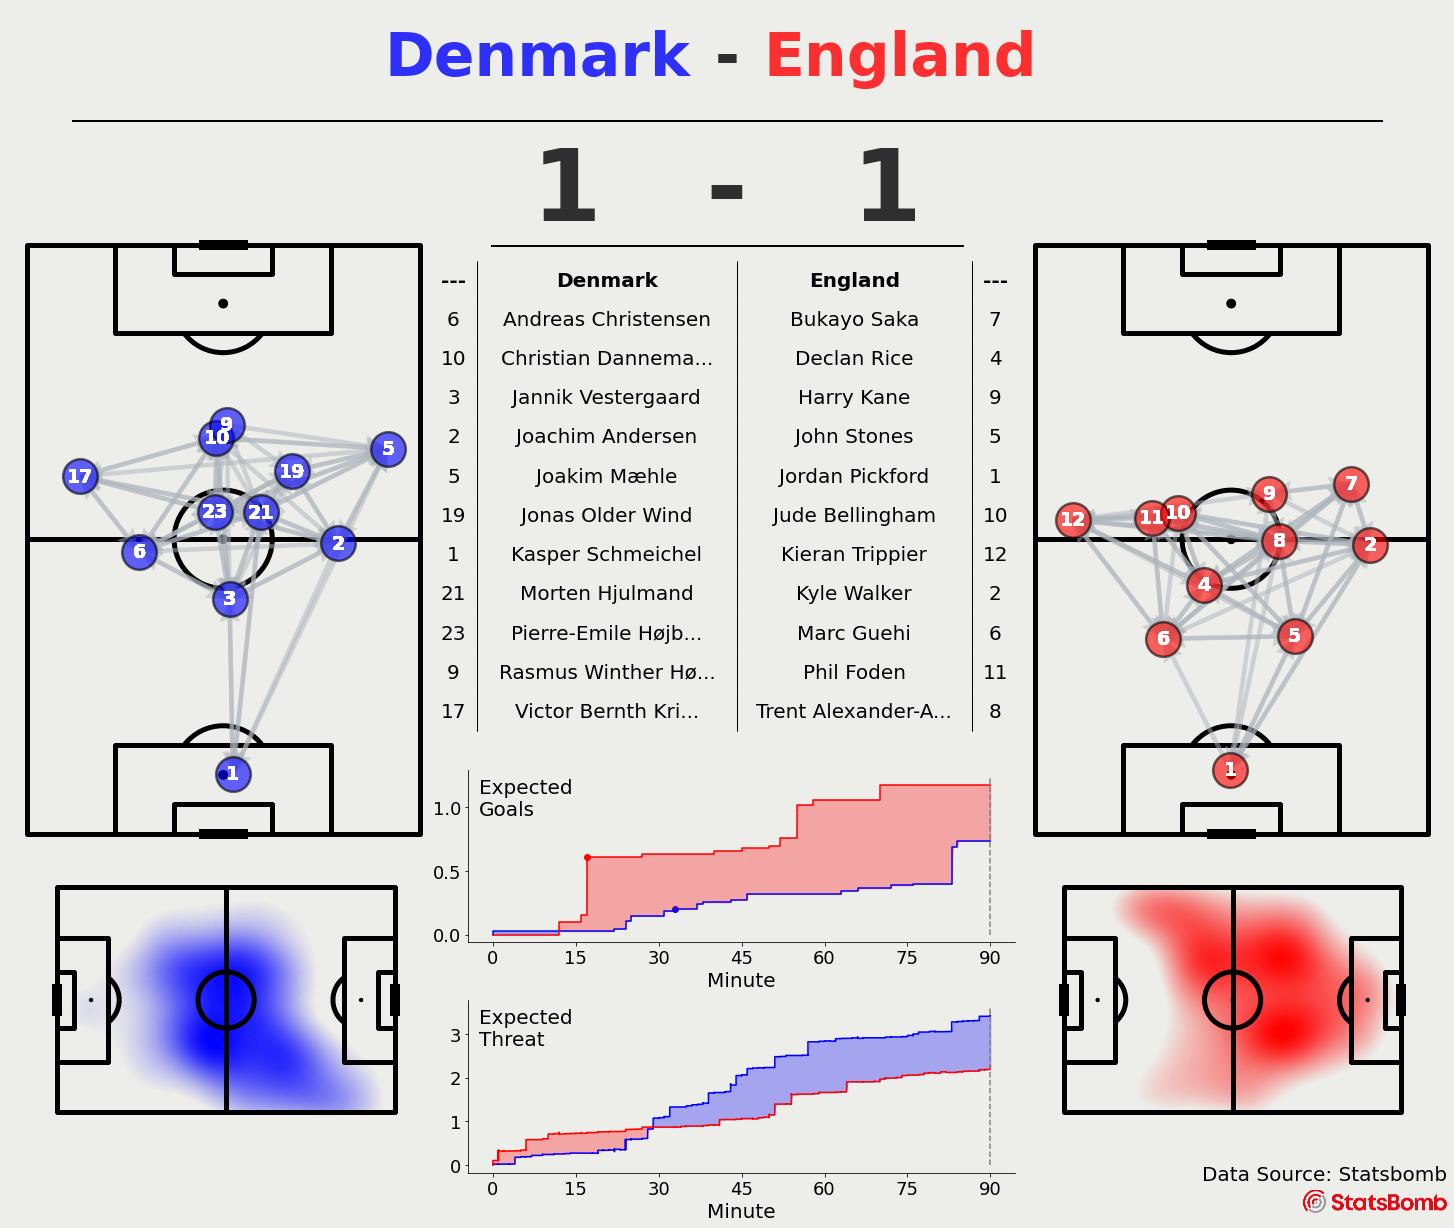

In [24]:
fig = plt.figure(layout='constrained',figsize=(20,20))

gs0 = gridspec.GridSpec(2, 4, figure=fig, width_ratios=[0.5,0.5,0.5,0.6], height_ratios=[0.1,1])

gs11 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs0[0,0:3])
ax4 = fig.add_subplot(gs11[0,0:3])
ax1 = fig.add_subplot(gs11[1,0:3])


gs1 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[1,0])
ax0 = fig.add_subplot(gs1[0,0])
ax2 = fig.add_subplot(gs1[1,0])

gs2 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[1,1])
ax3 = fig.add_subplot(gs2[0,0])
ax8 = fig.add_subplot(gs2[1,0])

gs3 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[1,2])
ax6 = fig.add_subplot(gs3[0,0])
ax5 = fig.add_subplot(gs3[1,0])

pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#edede9', line_color='black',stripe_color='#edede9',
                      line_alpha = 1,linewidth=5, spot_scale=0.0075,stripe=True)
pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True,ax = ax0)

arrows1 = pitch.arrows(pass_between1.x,pass_between1.y,pass_between1.x_end,pass_between1.y_end,ax=ax0,
                     width = 4.5, headwidth = 4.5, color='#adb5bd', zorder = 1, alpha = 0.5)
nodes1 = pitch.scatter(average_locations1.x,average_locations1.y,
                     s = 1200, color = 'blue', edgecolors = 'black', linewidth = 2.5,alpha = 0.6, zorder = 1, ax=ax0)
for index, row in numbers1.iterrows():
    pitch.annotate(row.jersey_number, xy=(row.x_x, row.y_x), c='white', va='center',
                   ha='center', size=19, weight='bold', ax=ax0,zorder=2)

pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#edede9', line_color='black',stripe_color='#edede9',
                      line_alpha = 1,linewidth=5, spot_scale=0.0075,stripe=True)
pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True,ax = ax6)

arrows2 = pitch.arrows(pass_between2.x,pass_between2.y,pass_between2.x_end,pass_between2.y_end,ax=ax6,
                     width = 4.5, headwidth = 4.5, color='#adb5bd', zorder = 1, alpha = 0.5)
nodes2 = pitch.scatter(average_locations2.x,average_locations2.y,
                     s = 1200, color = 'red', edgecolors = 'black', linewidth = 2.5,alpha = 0.6, zorder = 1, ax=ax6)

for index, row in numbers2.iterrows():
    pitch.annotate(row.jersey_number, xy=(row.x_x, row.y_x), c='white', va='center',
                   ha='center', size=19, weight='bold', ax=ax6,zorder=2)

pitch = Pitch(pitch_type='statsbomb', pitch_color='#edede9', line_color='black',
                      line_alpha = 1,linewidth=5, spot_scale=0.005,stripe=False,half=False)
pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True,ax = ax2)

pitch = Pitch(pitch_type='statsbomb', pitch_color='#edede9', line_color='black',
                      line_alpha = 1,linewidth=5, spot_scale=0.005,stripe=False,half=False)
pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True,ax = ax8)

ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.set_xlabel('Minute',size=20)
ax5.scatter(h_min_goal,h_goal,s=35,color='blue')
ax5.scatter(a_min_goal,a_goal,s=35,color='red')
ax5.step(x=h_min,y=h_cumulative_xG_final,where='post',label=f"{home_info[1]}",color='blue') 
ax5.step(x=a_min,y=a_cumulative_xG_final,where='post',label=f"{away_info[1]}",color='red') 
ax5.tick_params(axis='x', labelsize=18)
ax5.tick_params(axis='y', labelsize=18)

x_h = h_min
y_h = h_cumulative_xG_final
x_a = a_min
y_a = a_cumulative_xG_final

max_min = []

if h_min >= a_min:
    max_min.append(h_min[-1])
if a_min > h_min:
    max_min.append(a_min[-1])

x_target = np.linspace(0,max_min[0],360)

if max_min[0] <= 90:
    ax5.set_xticks([0,15,30,45,60,75,90])
    ax5.plot([90, 90], [0, ax5.get_ylim()[1]], linestyle='--', color='gray')
if max_min[0] > 90:
    ax5.set_xticks([0,15,30,45,60,75,90,105,120])
    ax5.plot([120, 120], [0, ax5.get_ylim()[1]], linestyle='--', color='gray')


y_limit_h = []
y_limit_a = []
for i in range(len(x_target)):
    y_limit_h.append(step_limit(x_h, y_h, x_target[i], step_type='pre'))
    y_limit_a.append(step_limit(x_a, y_a, x_target[i], step_type='pre'))
y_limit_h_great = []
y_limit_a_great = []
for i in range(len(x_target)):
    if y_limit_h[i]>=y_limit_a[i]:
        y_limit_h_great.append(x_target[i])
    if y_limit_a[i]>y_limit_h[i]:
        y_limit_a_great.append(x_target[i])
              
numbers = x_target
target_list = y_limit_h_great
targets = set(target_list)
bool_list_h = [num in targets for num in numbers]
target_list = y_limit_a_great
targets = set(target_list)
bool_list_a = [num in targets for num in numbers]
ax5.fill_between(x_target, y_limit_h, y_limit_a, 
                 where=(bool_list_h), 
                 interpolate=True, color='blue', alpha=0.3)
ax5.fill_between(x_target, y_limit_a, y_limit_h, 
                 where=(bool_list_a), 
                 interpolate=True, color='red', alpha=0.3)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xlabel('Minute',size=20)
ax1.step(x=h_min_xT,y=h_cumulative_xT_final,where='post',label=f"{home_info[1]}",color='blue') 
ax1.step(x=a_min_xT,y=a_cumulative_xT_final,where='post',label=f"{away_info[1]}",color='red') 
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)

x_h_xT = h_min_xT
y_h_xT = h_cumulative_xT_final
x_a_xT = a_min_xT
y_a_xT = a_cumulative_xT_final

max_min_xT = []

if h_min_xT >= a_min_xT:
    max_min_xT.append(h_min_xT[-1])
if a_min_xT > h_min_xT:
    max_min_xT.append(a_min_xT[-1])

x_target_xT = np.linspace(0,max_min_xT[0],360)

if max_min_xT[0] <= 90:
    ax1.set_xticks([0,15,30,45,60,75,90])
    ax1.plot([90, 90], [0, ax1.get_ylim()[1]], linestyle='--', color='gray')
if max_min_xT[0] > 90:
    ax1.set_xticks([0,15,30,45,60,75,90,105,120])
    ax1.plot([120, 120], [0, ax1.get_ylim()[1]], linestyle='--', color='gray')


y_limit_h_xT = []
y_limit_a_xT = []
for i in range(len(x_target_xT)):
    y_limit_h_xT.append(step_limit(x_h_xT, y_h_xT, x_target_xT[i], step_type='pre'))
    y_limit_a_xT.append(step_limit(x_a_xT, y_a_xT, x_target_xT[i], step_type='pre'))
y_limit_h_great_xT = []
y_limit_a_great_xT = []
for i in range(len(x_target_xT)):
    if y_limit_h_xT[i]>=y_limit_a_xT[i]:
        y_limit_h_great_xT.append(x_target_xT[i])
    if y_limit_a_xT[i]>y_limit_h_xT[i]:
        y_limit_a_great_xT.append(x_target_xT[i])
              
numbers_xT = x_target_xT
target_list_xT = y_limit_h_great_xT
targets_xT = set(target_list_xT)
bool_list_h_xT = [num in targets_xT for num in numbers_xT]
target_list_xT = y_limit_a_great_xT
targets_xT = set(target_list_xT)
bool_list_a_xT = [num in targets_xT for num in numbers_xT]
ax1.fill_between(x_target_xT, y_limit_h_xT, y_limit_a_xT, 
                 where=(bool_list_h_xT), 
                 interpolate=True, color='blue', alpha=0.3)
ax1.fill_between(x_target_xT, y_limit_a_xT, y_limit_h_xT, 
                 where=(bool_list_a_xT), 
                 interpolate=True, color='red', alpha=0.3)

fig.set_facecolor('#edede9')
ax1.set_facecolor('#edede9')
ax3.set_facecolor('#edede9')
ax4.set_facecolor('#edede9')
ax5.set_facecolor('#edede9')
ax8.set_facecolor('#edede9')


data = {
    'h': np.array([jersey_numbers1.loc[0,'jersey_number'],jersey_numbers1.loc[1,'jersey_number'],jersey_numbers1.loc[2,'jersey_number'],jersey_numbers1.loc[3,'jersey_number'],jersey_numbers1.loc[4,'jersey_number'],jersey_numbers1.loc[5,'jersey_number'],jersey_numbers1.loc[6,'jersey_number'],jersey_numbers1.loc[7,'jersey_number'],jersey_numbers1.loc[8,'jersey_number'],jersey_numbers1.loc[9,'jersey_number'],jersey_numbers1.loc[10,'jersey_number']]),
    home_info[0]: np.array([jersey_numbers1.loc[0,'player'],jersey_numbers1.loc[1,'player'],jersey_numbers1.loc[2,'player'],jersey_numbers1.loc[3,'player'],jersey_numbers1.loc[4,'player'],jersey_numbers1.loc[5,'player'],jersey_numbers1.loc[6,'player'],jersey_numbers1.loc[7,'player'],jersey_numbers1.loc[8,'player'],jersey_numbers1.loc[9,'player'],jersey_numbers1.loc[10,'player']]),
    away_info[0]: np.array([jersey_numbers2.loc[0,'player'],jersey_numbers2.loc[1,'player'],jersey_numbers2.loc[2,'player'],jersey_numbers2.loc[3,'player'],jersey_numbers2.loc[4,'player'],jersey_numbers2.loc[5,'player'],jersey_numbers2.loc[6,'player'],jersey_numbers2.loc[7,'player'],jersey_numbers2.loc[8,'player'],jersey_numbers2.loc[9,'player'],jersey_numbers2.loc[10,'player']]),
    'a': np.array([jersey_numbers2.loc[0,'jersey_number'],jersey_numbers2.loc[1,'jersey_number'],jersey_numbers2.loc[2,'jersey_number'],jersey_numbers2.loc[3,'jersey_number'],jersey_numbers2.loc[4,'jersey_number'],jersey_numbers2.loc[5,'jersey_number'],jersey_numbers2.loc[6,'jersey_number'],jersey_numbers2.loc[7,'jersey_number'],jersey_numbers2.loc[8,'jersey_number'],jersey_numbers2.loc[9,'jersey_number'],jersey_numbers2.loc[10,'jersey_number']])}

df = pd.DataFrame(data)

df[home_info[0]] = df[home_info[0]].apply(lambda x: truncate_text(x, 20))
df[away_info[0]] = df[away_info[0]].apply(lambda x: truncate_text(x, 20))

df.rename(columns={'h': ' --- '}, inplace=True)
df.rename(columns={'a': ' --- '}, inplace=True)

ax3.axis('tight')
ax3.axis('off')
table = ax3.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
for (row, col), cell in table.get_celld().items():
    cell.set_linewidth(0) 
    if col != -1:
        cell.set_linewidth(1)
        if col == 0:
            cell.visible_edges = 'R'
        if col == 1: 
            cell.visible_edges = 'LR'
        if col == 2:
            cell.visible_edges = 'LR'
        if col == 3:
            cell.visible_edges = 'L'

for col in range(len(df.columns)):
    table[(0, col)].set_text_props(weight='bold')

column_widths = [0.1, 0.3, 0.3, 0.1]

for i, width in enumerate(column_widths):
    table.auto_set_column_width([i])
    for j in range(len(df) + 1):
        table[(j, i)].set_width(width)
            
for i in range(4):         
    for j in range(12):
        table.auto_set_font_size(False)
        table[j,i].set_fontsize(20)

ax4.axis('off')
ax4.text(0.5, 0.48, f"{home_info[1]}" +'   -   'f"{away_info[1]}", fontsize=100, ha='center', va='center',weight='bold',alpha=0.8)

line_y_position1 = 0.7
line_y_position2 = 0.318

ax4.plot([0, 1], [line_y_position1, line_y_position1], color='black', lw=2)
ax4.plot([0.32, 0.68], [line_y_position2, line_y_position2], color='black', lw=2)


ax4.plot([0, 1], [0, 0], color='#edede9', lw=0) 
ax4.plot([0, 1], [1, 1], color='#edede9', lw=0) 

team1 = home_info[0][:19]
team2 = away_info[0][:19]
hyphen = "-"
fontsize = 60
len_team1 = len(team1)
len_team2 = len(team2)
spacing_multiplier = 0.008
height_number = 0.89
ax4.text(0.5 - len_team1 / 2 * spacing_multiplier, height_number, team1, fontsize=fontsize, horizontalalignment='right', verticalalignment='center',weight='bold',c='blue',alpha=0.8)
ax4.text(0.5, height_number, hyphen, fontsize=fontsize, horizontalalignment='center', verticalalignment='center',weight='bold',alpha=0.8)
ax4.text(0.5 + len_team1 / 2 * spacing_multiplier, height_number, team2, fontsize=fontsize, horizontalalignment='left', verticalalignment='center',weight='bold',c='red',alpha=0.8)

hex_color1 = 'blue'
rgb_color1 = mcolors.hex2color(hex_color1)
colors1 = [(0, (mcolors.hex2color('#edede9'))),(1, rgb_color1)]
cmap1 = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors1)
kdeplot1 = pitch.kdeplot(x=successful1['x'],y=successful1['y'],ax=ax2,fill=True,
                        levels=100,alpha=1,thresh=0.15, cut=5,cmap = cmap1,zorder = -1)

hex_color2 = 'red'
rgb_color2 = mcolors.hex2color(hex_color2)
colors2 = [(0, (mcolors.hex2color('#edede9'))),(1, rgb_color2)]
cmap2 = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors2)
kdeplot2 = pitch.kdeplot(x=successful2['x'],y=successful2['y'],ax=ax8,fill=True,
                        levels=100,alpha=1,thresh=0.15, cut=5,cmap = cmap2,zorder = -1)

ax8.invert_xaxis()
ax8.invert_yaxis()

width0 = 0.3
height0 = 0.8
left0 = 0
bottom0 = ((1 - height0) / 2) - 0.3
ax0.set_position([left0,bottom0,width0,height0])

width6 = 0.3
height6 = 0.8
left6 = 1-width6
bottom6 = ((1 - height0) / 2) - 0.3
ax6.set_position([left6,bottom6,width6,height6])

width2 = 0.25
height2 = 0.4
left2 = 0.027
bottom2 = -0.35 + 0.03
ax2.set_position([left2,bottom2,width2,height2])

width8 = 0.25
height8 = 0.4
left8 = 1-0.024-width8
bottom8 = -0.35 + 0.03
ax8.set_position([left8,bottom8,width8,height8])

width5 = 0.38 
height5 = 0.12
left5 = width0 + 0.02
bottom5 = ((1 - height5) / 2) - 0.52
ax5.set_position([left5,bottom5,width5,height5])

width3 = 0.4 
height3 = 0.6
left3 = width0-0.002
bottom3 = ((1 - height5) / 2) - 0.51
ax3.set_position([left3, bottom3, width3, height3])

width1 = 0.38
height1 = 0.12
left1 = width0 + 0.02
bottom1 = ((1 - height1) / 2) - 0.68
ax1.set_position([left1,bottom1,width1,height1])

ax4.set_position([0,0.32,1,0.25])

ax1.text(0.02, 0.95, 'Expected\nThreat', transform=ax1.transAxes,
        fontsize=20, verticalalignment='top', horizontalalignment='left')

ax5.text(0.02, 0.95, 'Expected\nGoals', transform=ax5.transAxes,
        fontsize=20, verticalalignment='top', horizontalalignment='left')

fig = add_image(image="SB - Icon Lockup - Colour positive.png", fig=fig, left=0.9, bottom=-0.29, width=0.1, height=0.06)
CREDIT_1 = "Data Source: Statsbomb"
fig.text(
    1.0, -0.245, f"{CREDIT_1}", size=20,
    color="#000000",
    ha="right")

plt.show()